In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [2]:
from qiskit.visualization import plot_distribution

In [3]:
from qiskit_ibm_runtime import RuntimeDecoder

In [4]:
import os
import glob
import json
import pandas as pd
from qiskit_ibm_runtime import RuntimeDecoder

def read_job_results(folder_path, csv_file):
    workloads = pd.read_csv(csv_file)
    job_ids = workloads.iloc[:, 0].astype(str).tolist()

    json_files = glob.glob(os.path.join(folder_path, "*.json"))
    job_results = {}

    for json_file in json_files:
        file_name = os.path.basename(json_file)
        if file_name.startswith("job-") and "-result.json" in file_name:
            job_id = file_name.split("-")[1]
            if job_id in job_ids:
                with open(json_file, 'r') as file:
                    try:
                        result = json.load(file, cls=RuntimeDecoder)
                        

                        counts = result[0].data.meas.get_counts()
                        
                        job_results[job_id] = counts
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON file: {json_file}, Error: {e}")
                    except AttributeError as e:
                        print(f"Error accessing measurement data in file: {json_file}, Error: {e}")
    
    return job_results



folder_path = "./workloads"
csv_file = "./workloads/workloads.csv" 



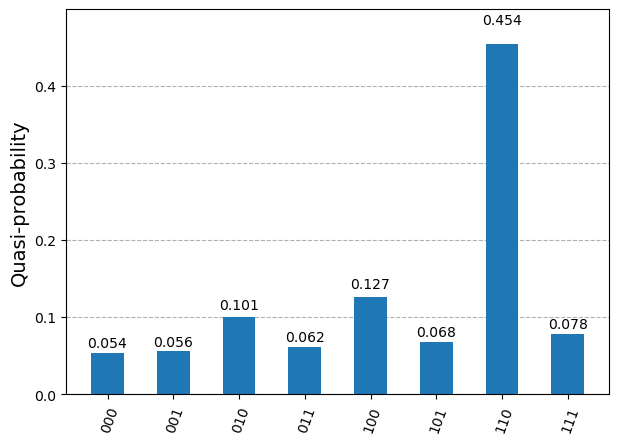

In [32]:
results = read_job_results(folder_path, csv_file)
plot_distribution(results['cxbahjytpsjg008cjgn0'])

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='2ce8efea0ea2f41cfe2db92f4771b22c101f583f98e4871b0893c8efb5c5cb8216928ae2ab16b108f59f79c36d5b711f5203a665cb65900e384b3a452c693f4b'
)
job = service.job('cxcegkabqkhg00830v10')
job_result = job.result()

# To get counts for a particular pub result, use 
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

In [2]:
dist = job_result[0].data.meas.get_counts()

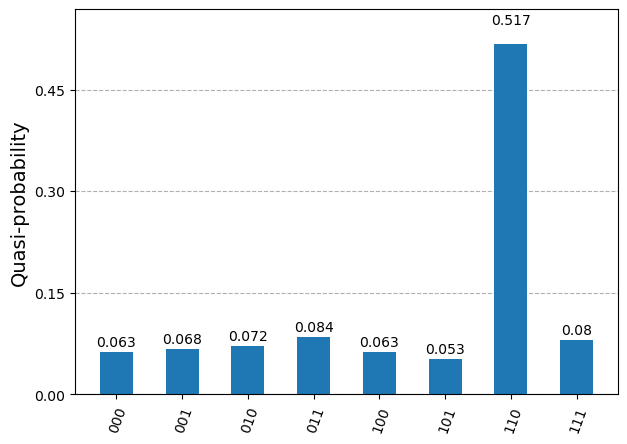

In [4]:
from qiskit.visualization import plot_distribution

plot_distribution(dist)